In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
import psutil
import gc 
from scipy.ndimage import gaussian_filter1d
import time



In [2]:
from branch_sim import MamSimulation
from utils.gen_utils import graph_to_model_format, plot_magn_energy
from main_tree import simulate_ising_model, animate_ising_model, plot_graph
from IsingModel import IsingModel

/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [6]:
tmax = 100
temps = np.linspace(0.01, 1.5, 50)
J = 1.0
n_equilib_steps = 50_000
n_mcmc_steps = 10_000
n_samples = 100
n_sample_interval = 100
seed = 43


In [7]:
### Generate the branching structure

sim = MamSimulation(tmax=tmax, seed=seed)
coordinates, evolve, G = sim.simulate()
nodes, neighbors = graph_to_model_format(G)


Starting simulation...


100%|██████████| 100/100 [00:00<00:00, 813.13it/s]

Branch growth simulation completed in 0.12654519081115723 seconds


In [8]:
### run the ising model simulation
magn, energy, specific_heat, susceptibility = [], [], [], []
for T in temps:
    nodes = np.random.choice([-1,1], size=nodes.shape[0])
    model = IsingModel(
        nodes,neighbors, temp=T, J=J, n_equilib_steps=n_equilib_steps, n_mcmc_steps=n_mcmc_steps, n_samples=n_samples, G=G
    )
    model = simulate_ising_model(model)
    magn.append(model.total_magn)
    energy.append(model.total_energy)
    specific_heat.append(model.specific_heat)
    susceptibility.append(model.susceptibility)

# smooth the data
sigma = 4

sm_magn = gaussian_filter1d(magn[tmax], sigma=sigma)
sm_energy = gaussian_filter1d(energy[tmax], sigma=sigma)
sm_specific_heat = gaussian_filter1d(specific_heat[tmax], sigma=sigma)
sm_susceptibility = gaussian_filter1d(susceptibility[tmax], sigma=sigma)



Time taken:  12.068027973175049
Time taken:  10.55782413482666
Time taken:  10.493349075317383
Time taken:  10.555078983306885
Time taken:  10.549939155578613
Time taken:  10.516416788101196
Time taken:  10.607283115386963
Time taken:  10.397196054458618
Time taken:  10.48076868057251
Time taken:  10.784315824508667
Time taken:  10.537876844406128
Time taken:  10.618474960327148
Time taken:  10.579876184463501
Time taken:  10.80850887298584
Time taken:  10.969624757766724
Time taken:  11.036110162734985
Time taken:  10.953760147094727
Time taken:  11.018561124801636
Time taken:  11.358050107955933
Time taken:  10.87439489364624
Time taken:  10.726745843887329
Time taken:  10.81172513961792
Time taken:  10.583922863006592
Time taken:  10.737668752670288
Time taken:  10.87054181098938
Time taken:  10.719280242919922
Time taken:  11.12523889541626
Time taken:  11.043023824691772
Time taken:  10.756590127944946
Time taken:  10.944797277450562
Time taken:  11.070085287094116
Time taken:  10

IndexError: list index out of range

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# plot the specific heats for each tmax - unsmoothened

axs[0,0].plot(temps, sm_energy, label=f'tmax={tmax}')
axs[0,1].plot(temps, sm_magn, label=f'tmax={tmax}')
axs[1,0].plot(temps, sm_specific_heat, label=f'tmax={tmax}')
axs[1,1].plot(temps, sm_susceptibility, label=f'tmax={tmax}')
plt.show()


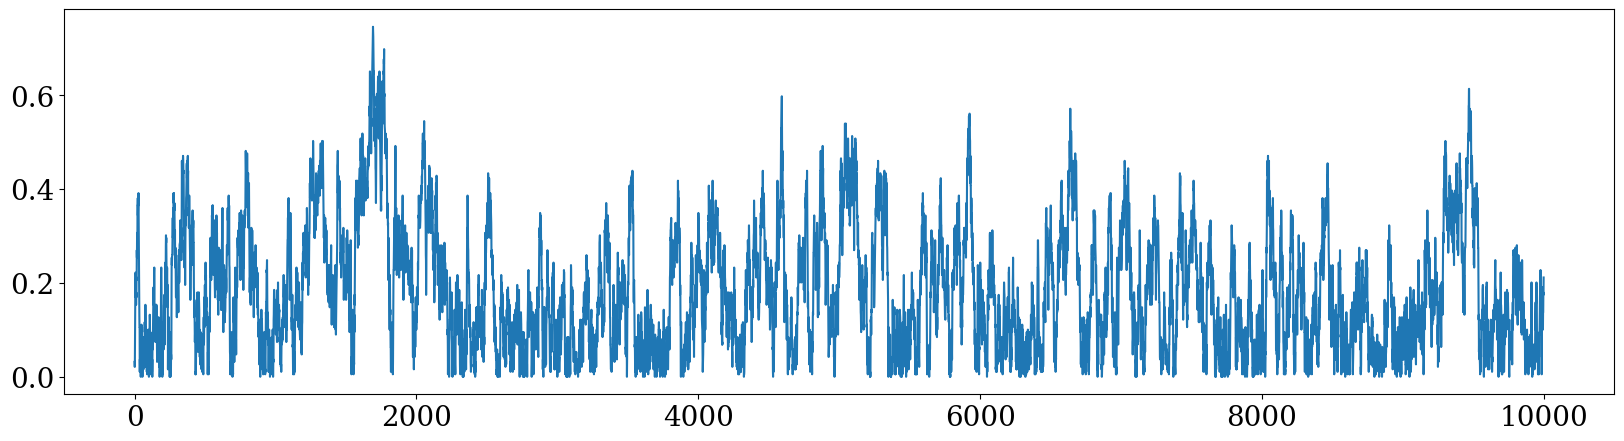

In [30]:
plt.figure(figsize=(20,5))
plt.plot(model.sampl_magn)




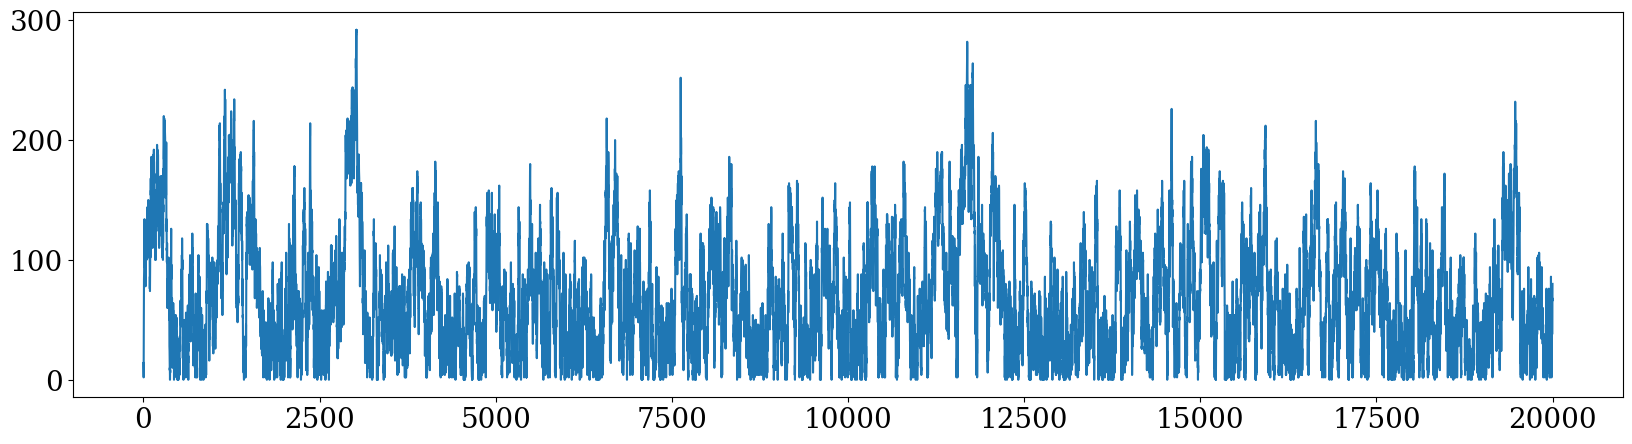

In [31]:
plt.figure(figsize=(20,5))
plt.plot(model.all_magn)

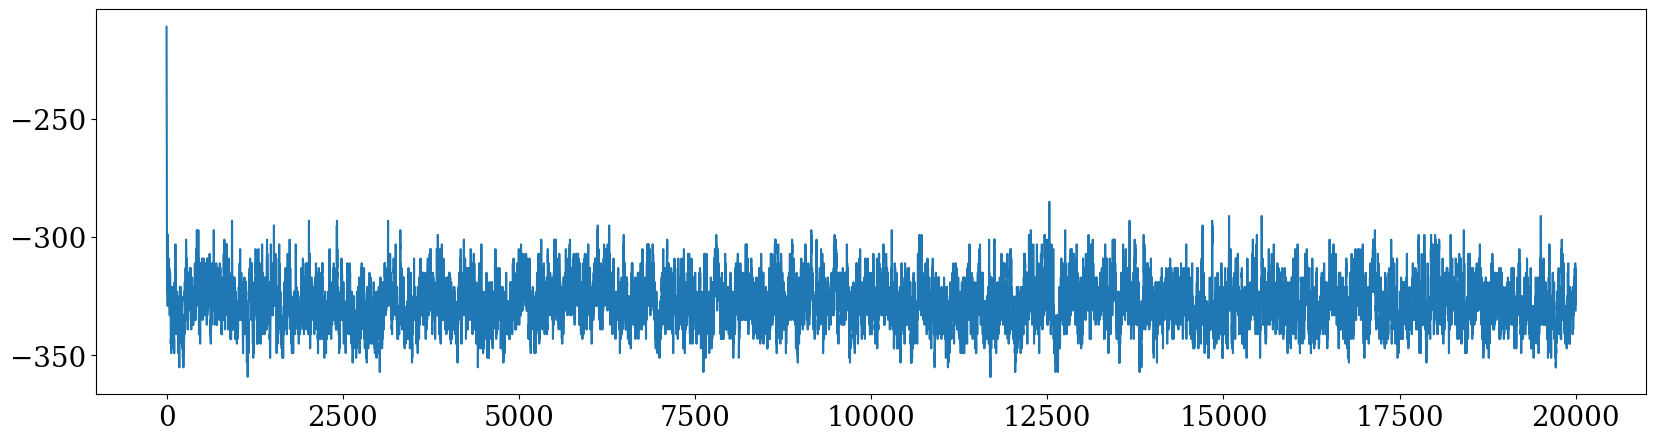

In [32]:
plt.figure(figsize=(20,5))
plt.plot(model.all_energy)


[[  0.98174953 150.19019      0.           1.        ]
 [  1.9463354  150.45395      0.           1.        ]
 [  2.8056679  150.96536      0.           1.        ]
 ...
 [ 45.587753   181.2678      21.          30.        ]
 [ 46.822025   194.1352       1.           3.        ]
 [ 59.661587   131.59338     14.          19.        ]]


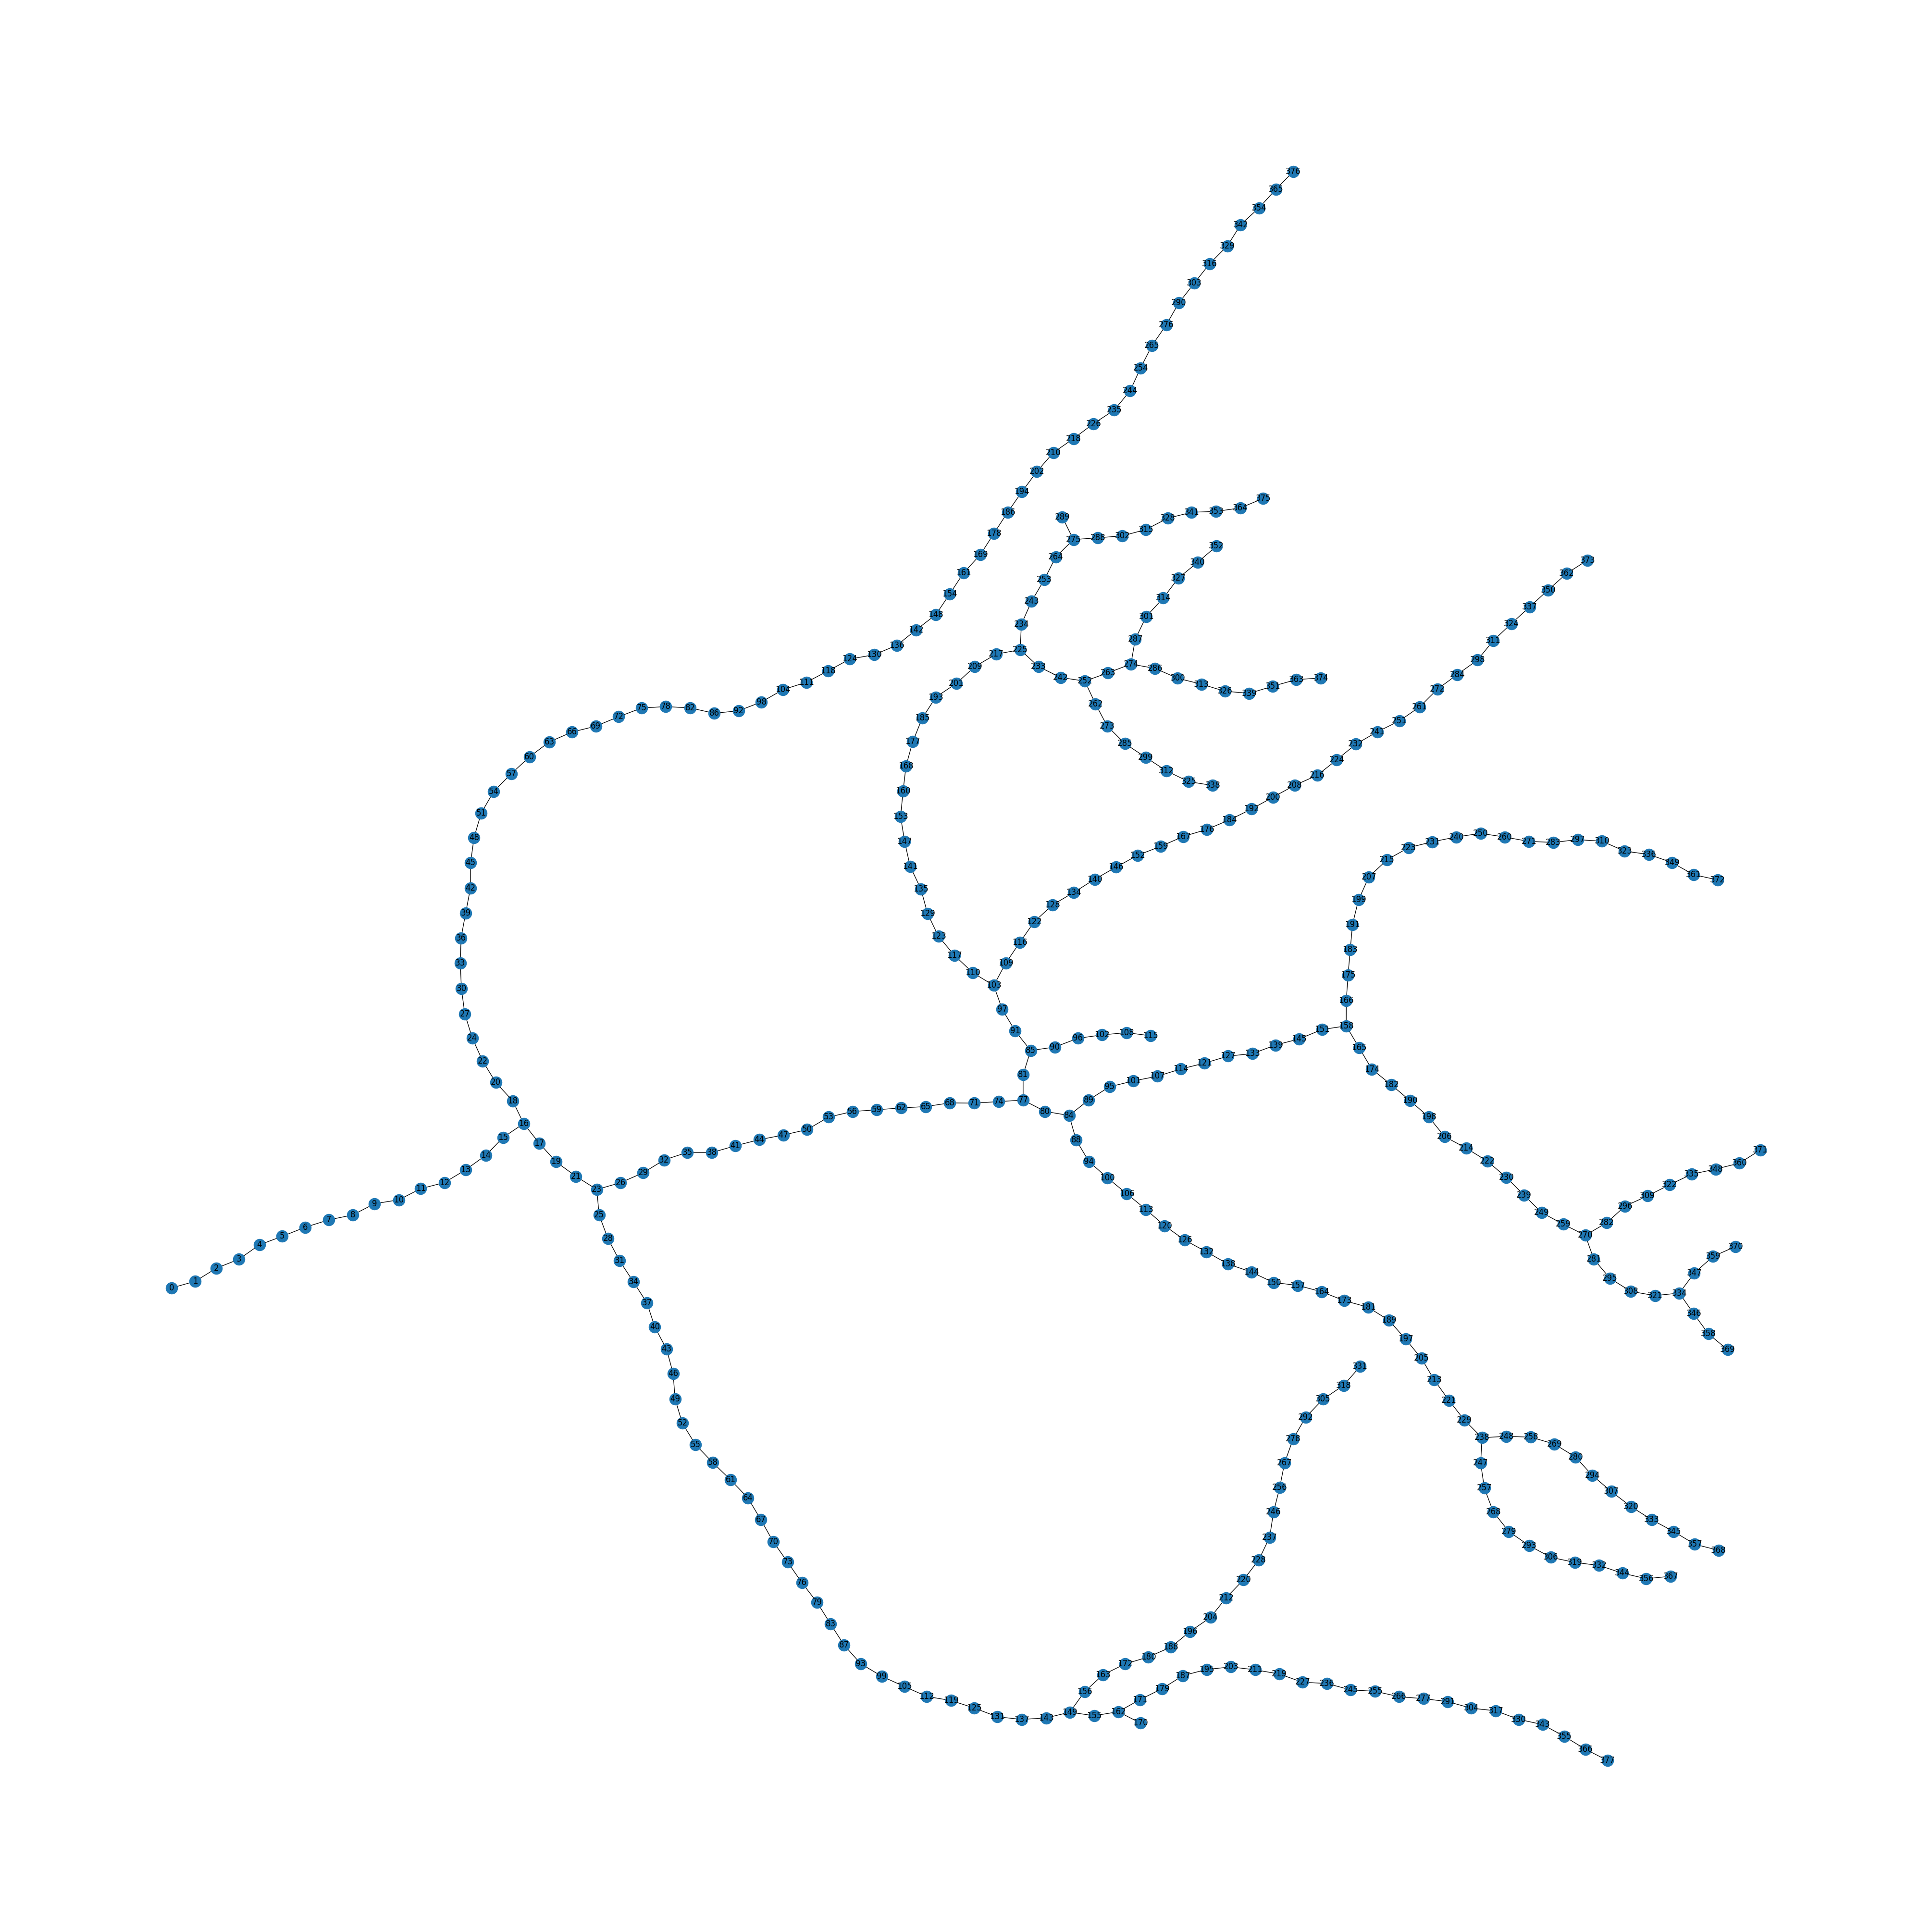

377
378


In [38]:
# construct the networkx graph based on the neighbors array
# this is the a 2d array with the row being the node and the columns being the neighbors
G = nx.Graph()

print(coordinates)

# create the nodes
for i in range(nodes.shape[0]):
    G.add_node(i, pos=(coordinates[i][0], coordinates[i][1]))

for i in range(nodes.shape[0]):
    for j in range(neighbors[i].shape[0]):
        if neighbors[i][j] != -1:
            G.add_edge(i, neighbors[i][j])

# plot the graph using networkx
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(40,40))
nx.draw(G, pos=pos, with_labels=True)
plt.show()

# print the amount of edges
print(G.number_of_edges())

# print the amount of nodes
print(G.number_of_nodes())

